In [71]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [66]:
'''
Load training data from MNIST public dataset. 
'''
training_data = pd.read_csv("DigitData\\train.csv")
training_data.head()
'''
In the current state, each row is an example of a digit drawn. 
Column 1 is the "label" for the digit, which is what we use to verify.
Every following column equals a pixel value. These pixel values range from 0 to 255. 0 representing white, and 255 representing black. 
There are 784 pixels because each image is (28 x 28). 
'''

'\nIn the current state, each row is an example of a digit drawn. \nColumn 1 is the "label" for the digit, which is what we use to verify.\nEvery following column equals a pixel value. These pixel values range from 0 to 255. 0 representing white, and 255 representing black. \nThere are 784 pixels because each image is (28 x 28). \n'

# Setting Up Training Data

- Convert Pandas DataFrame to numpy array for easier manipulation. 

- Transpose the data. By default the training data is set up where 1 digit is represented in 1 row, with 784 columns. 
  After transposing the data, each digit represents 1 column, with 784 rows.

- Split the dataset into training and test arrays. 
  The model will learn from the training data, and use the test data to verify it's accuracy. 


In [67]:
data = np.array(training_data)
np.random.shuffle(data)
# m = number of rows/examples
# n = number of features + label column. 
m, n = data.shape
# Transpose data. Now every example is represented in a column, instead of a row. 
data_test = data[0:1000].T
Y_test = data_test[0]
X_test = data_test[1:n]
# Transpose data for training. 
data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255

# Initialize the Model with Weights & Biases



In [68]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2
    
'''
Activation Function
'''
def ReLU(Z):
    # If greater than 0, Z will be returned. 
    # If less than 0, 0 will be returned. 
    return np.maximum(0, Z)

def ReLU_deriv(Z):
    return Z > 0


def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    
    return Z1, A1, Z2, A2

def back_prop(Z1, A1, Z2, A2, W2, X, Y):
    # Number of examples. 
    m = Y.size
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
   
    
    return dW1, db1, dW2, db2
     
def one_hot(Y):
    # Y.size represents how many examples there are. 
    # Y.max represents how many output classfications there are. 
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

In [69]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, iterations, alpha):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        # Forward pass through network 
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        # Backward pass through network
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W2, X, Y)
        # Update weights & biases
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if ( i % 10 == 0):
            print(f"Iteration: {i} || Accuracy: {'{:.2f}'.format(get_accuracy(get_predictions(A2), Y) * 100)} %")
            
    return W1, b1, W2, b2

# Run Model 


In [ ]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 1000, 0.5)

In [73]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

# Make Predictions

Prediction:  [9]
Label:  9


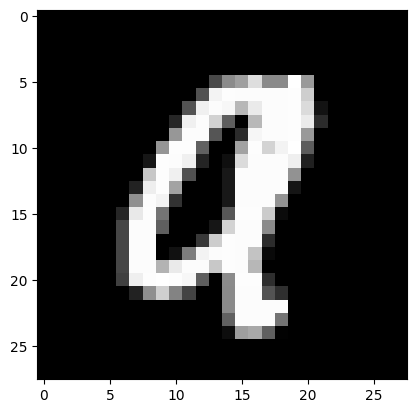

In [78]:
test_prediction(25, W1, b1, W2, b2)